In [2]:
!pip install pandas networkx matplotlib --quiet

In [3]:
# Instalar Noto Sans CJK (para cubrir coreano, japonés, etc.)
!apt-get -y install fonts-noto-cjk --quiet

Reading package lists...
Building dependency tree...
Reading state information...
Suggested packages:
  fonts-noto-cjk-extra
The following NEW packages will be installed:
  fonts-noto-cjk
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 61.2 MB of archives.
After this operation, 93.2 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 fonts-noto-cjk all 1:20220127+repack1-1 [61.2 MB]
Fetched 61.2 MB in 2s (25.8 MB/s)
Selecting previously unselected package fonts-noto-cjk.
(Reading database ... 126371 files and directories currently installed.)
Preparing to unpack .../fonts-noto-cjk_1%3a20220127+repack1-1_all.deb ...
Unpacking fonts-noto-cjk (1:20220127+repack1-1) ...
Setting up fonts-noto-cjk (1:20220127+repack1-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


##Analisis de Grafos

In [4]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [6]:
file_id = '1DrdpshZR4gFSTQ61b3fajihc0RyGtWws'
#file_id = '1h97krjdPVuKszy9NVcZiWNQuPUu3ICyc' #version con artist_id
url = f'https://drive.google.com/uc?export=download&id={file_id}'
df = pd.read_csv(url)
df.head()

,nodo_artista_1,nodo_artista_2,cantidad
0,Ally Brooke,A Boogie Wit da Hoodie,2
1,Ally Brooke,A$AP Ferg,6
2,Ally Brooke,Afrojack,13
3,Ally Brooke,B Jones,1
4,Ally Brooke,Carlos Santana,2


In [7]:
# Crear el grafo con pesos desde el DataFrame
G = nx.from_pandas_edgelist(df, source="nodo_artista_1", target="nodo_artista_2", edge_attr="cantidad")

In [8]:
# Generar layout
pos = nx.spring_layout(G, seed=42)

/tmp/ipython-input-4112951996.py:19: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


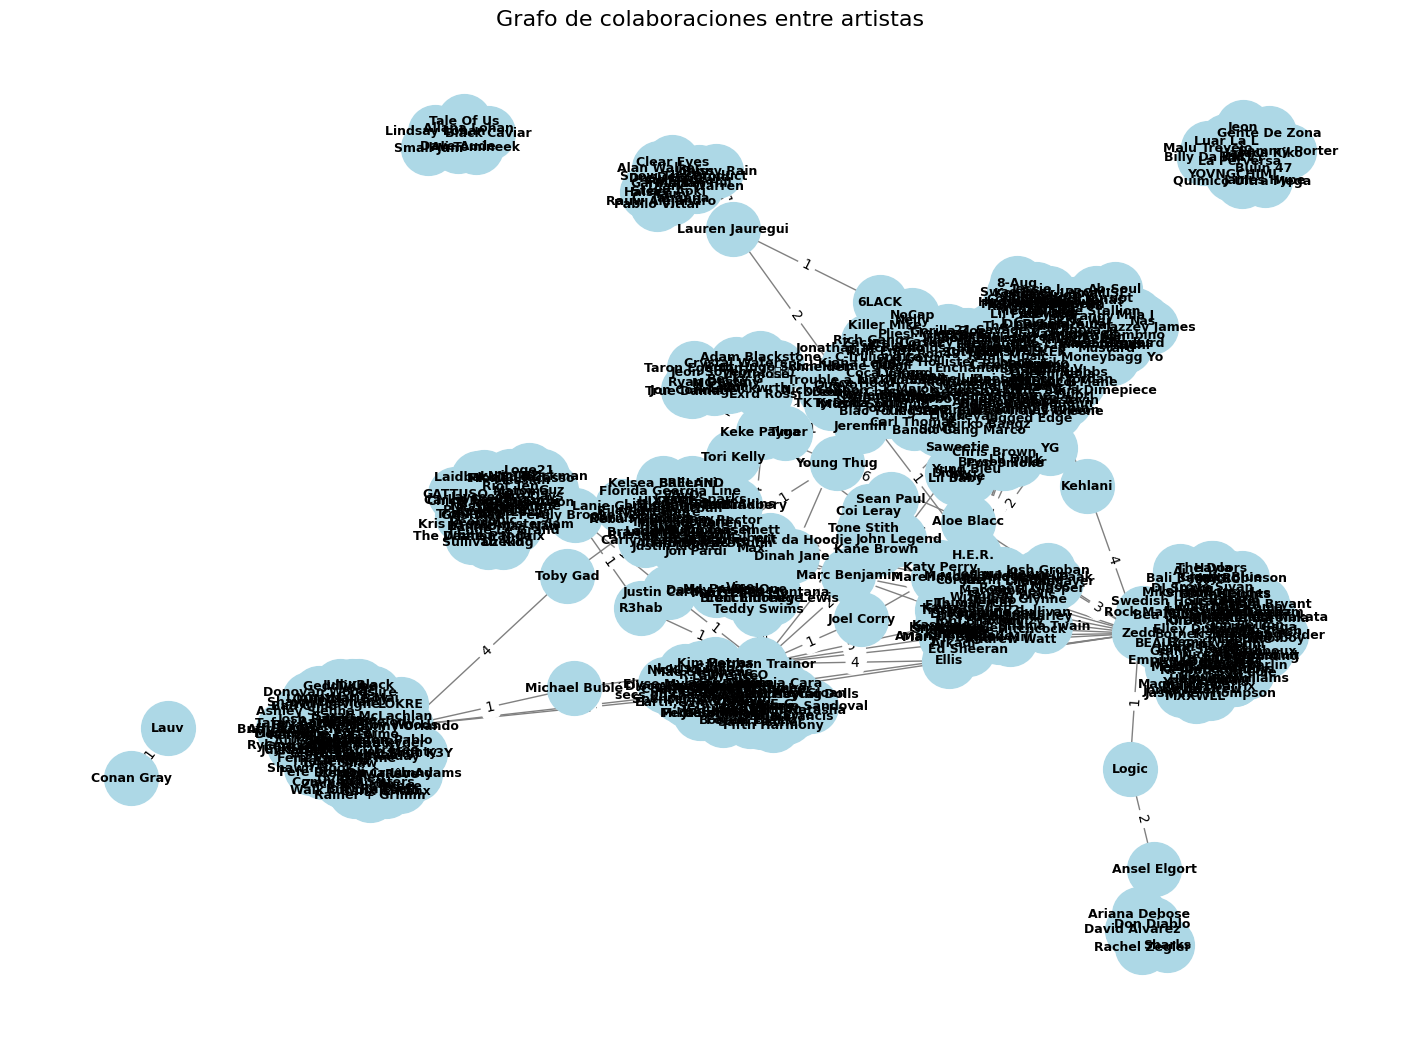

In [9]:
# Dibujar el grafo
plt.figure(figsize=(14, 10))
nx.draw(
    G, pos,
    with_labels=True,
    node_color="lightblue",
    edge_color="gray",
    node_size=1500,
    font_size=9,
    font_weight="bold"
)

# Dibujar etiquetas de los pesos (cantidad de colaboraciones)
edge_labels = nx.get_edge_attributes(G, "cantidad")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("Grafo de colaboraciones entre artistas", fontsize=16)
plt.axis("off")
plt.tight_layout()

plt.show()

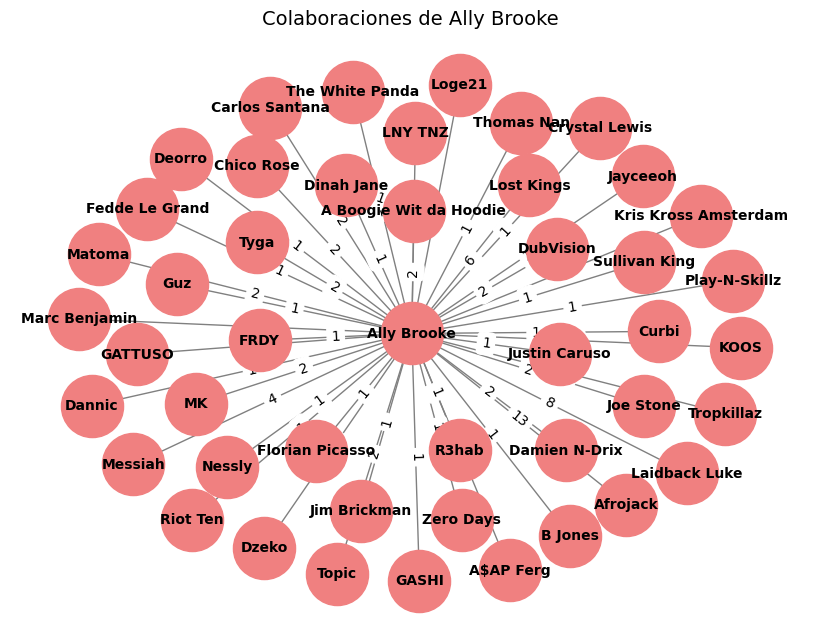

In [10]:
artista = "Ally Brooke"

# Crear un subgrafo con el artista y sus vecinos
sub_nodos = [artista] + list(G.neighbors(artista))
subgrafo = G.subgraph(sub_nodos)

# Dibujar
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(subgrafo, seed=42)
nx.draw(
    subgrafo, pos,
    with_labels=True,
    node_color="lightcoral",
    edge_color="gray",
    node_size=2000,
    font_size=10,
    font_weight="bold"
)

# Etiquetas de cantidad
edge_labels = nx.get_edge_attributes(subgrafo, "cantidad")
nx.draw_networkx_edge_labels(subgrafo, pos, edge_labels=edge_labels)

plt.title(f"Colaboraciones de {artista}", fontsize=14)
plt.axis("off")
#plt.tight_layout()
plt.show()

##Cálculo de Métricas

In [11]:
# Calcular métricas
grado = dict(G.degree())
grado_ponderado = dict(G.degree(weight="cantidad"))
centralidad_betweenness = nx.betweenness_centrality(G, weight="cantidad", normalized=True)
centralidad_closeness = nx.closeness_centrality(G)
pagerank = nx.pagerank(G, weight="cantidad")

In [12]:
# Crear DataFrame
metricas_df = pd.DataFrame({
    "Artista": list(G.nodes()),
    "Grado": [grado[n] for n in G.nodes()],
    "Grado_Ponderado": [grado_ponderado[n] for n in G.nodes()],
    "Centralidad_Betweenness": [centralidad_betweenness[n] for n in G.nodes()],
    "Centralidad_Closeness": [centralidad_closeness[n] for n in G.nodes()],
    "PageRank": [pagerank[n] for n in G.nodes()]
})

In [13]:
# Ordenar por PageRank descendente
metricas_ordenadas = metricas_df.sort_values("PageRank", ascending=False)

In [14]:
# Mostrar por consola (Top 20)
print("Top 20 artistas por PageRank (influencia):\n")
print(metricas_ordenadas.head(20).to_string(index=False))

Top 20 artistas por PageRank (influencia):

        Artista  Grado  Grado_Ponderado  Centralidad_Betweenness  Centralidad_Closeness  PageRank
       Jacquees    110              200                 0.274071               0.278623  0.078208
           Zedd     97              232                 0.283853               0.319942  0.075868
 Johnny Orlando     72               85                 0.214662               0.246755  0.052537
     Jhené Aiko     74              125                 0.240595               0.325281  0.049017
 Meghan Trainor     64              102                 0.412303               0.305954  0.043680
         H.E.R.     60               96                 0.392413               0.329802  0.039614
    Ally Brooke     45               90                 0.131492               0.278055  0.033373
   Thomas Rhett     44               53                 0.144889               0.282516  0.028779
    Keke Palmer     26               41                 0.071057          

##Análisis de Comunidades

In [15]:
from networkx.algorithms.community import greedy_modularity_communities

comunidades = list(greedy_modularity_communities(G))

In [16]:
componentes = list(nx.connected_components(G))
print(f"Número de componentes conexos: {len(componentes)}")

Número de componentes conexos: 4


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


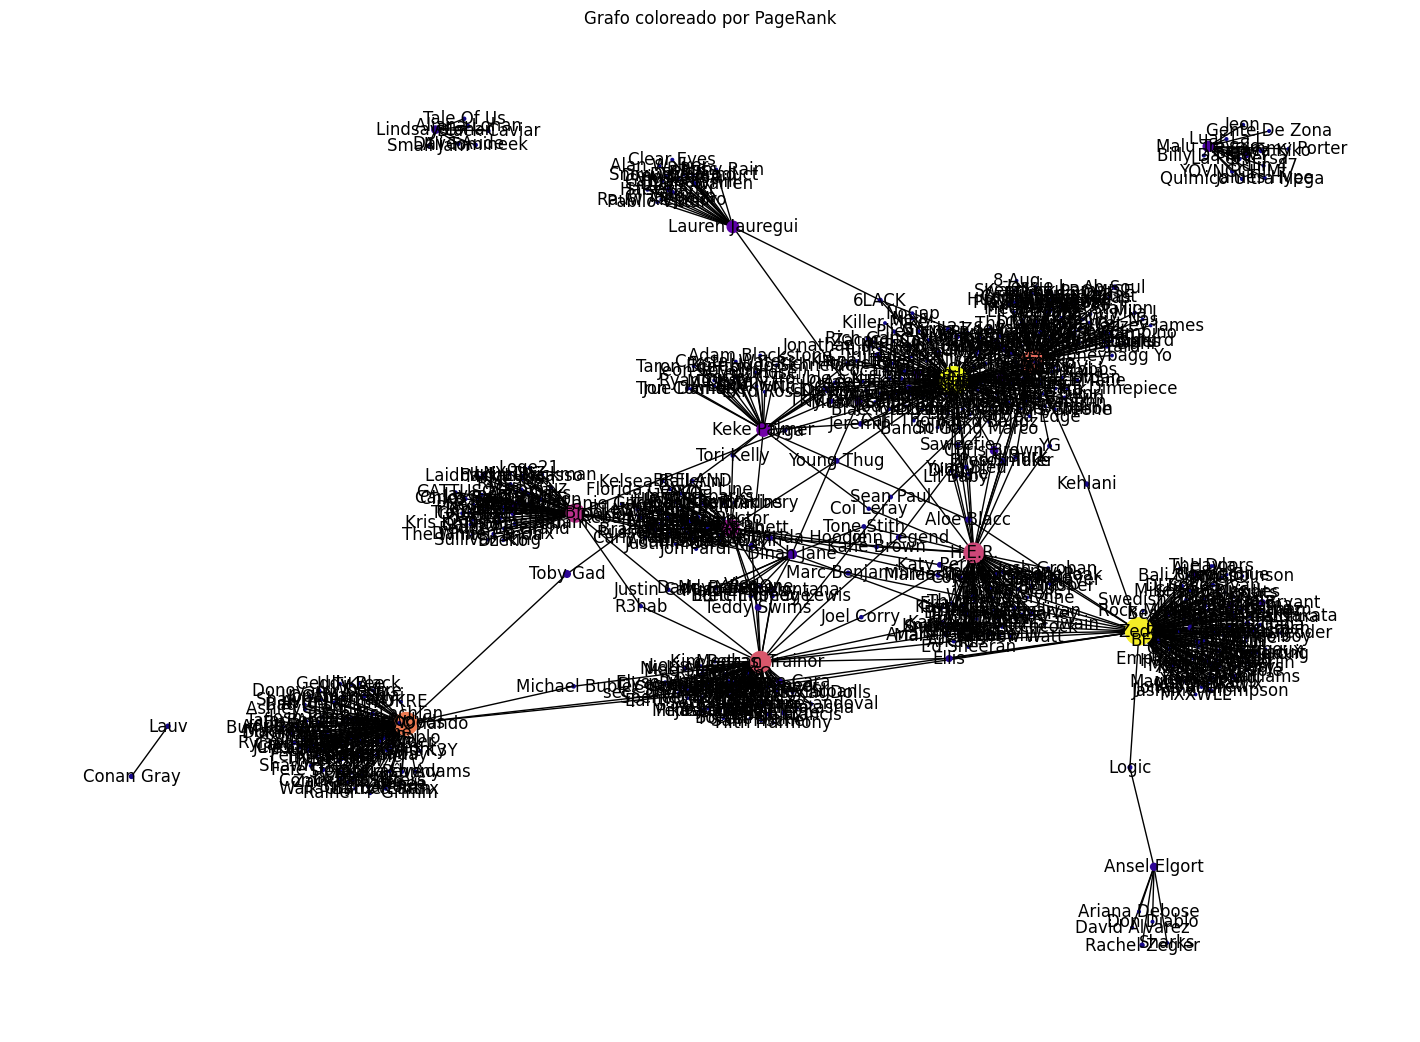

In [17]:
import matplotlib.pyplot as plt

pagerank = nx.pagerank(G, weight="cantidad")
valores = list(pagerank.values())

plt.figure(figsize=(14, 10))
pos = nx.spring_layout(G, seed=42)
nx.draw(
    G, pos,
    node_color=valores,
    cmap=plt.cm.plasma,
    node_size=[v * 5000 for v in valores],
    with_labels=True
)
plt.title("Grafo coloreado por PageRank")
plt.show()


In [21]:
# Diccionario de mapeo nombre → artist_id
mapping = {
    "Ally Brooke": "A01",
    "Ansel Elgort": "A02",
    "Conan Gray": "A03",
    "Dinah Jane": "A04",
    "H.E.R.": "A05",
    "Jacquees": "A06",
    "Jhené Aiko": "A07",
    "Johnny Orlando": "A08",
    "Keke Palmer": "A09",
    "Lauren Jauregui": "A10",
    "Lindsay Lohan": "A11",
    "Malu Trevejo": "A12",
    "Meghan Trainor": "A13",
    "Thomas Rhett": "A14",
    "Zedd": "A15"
}

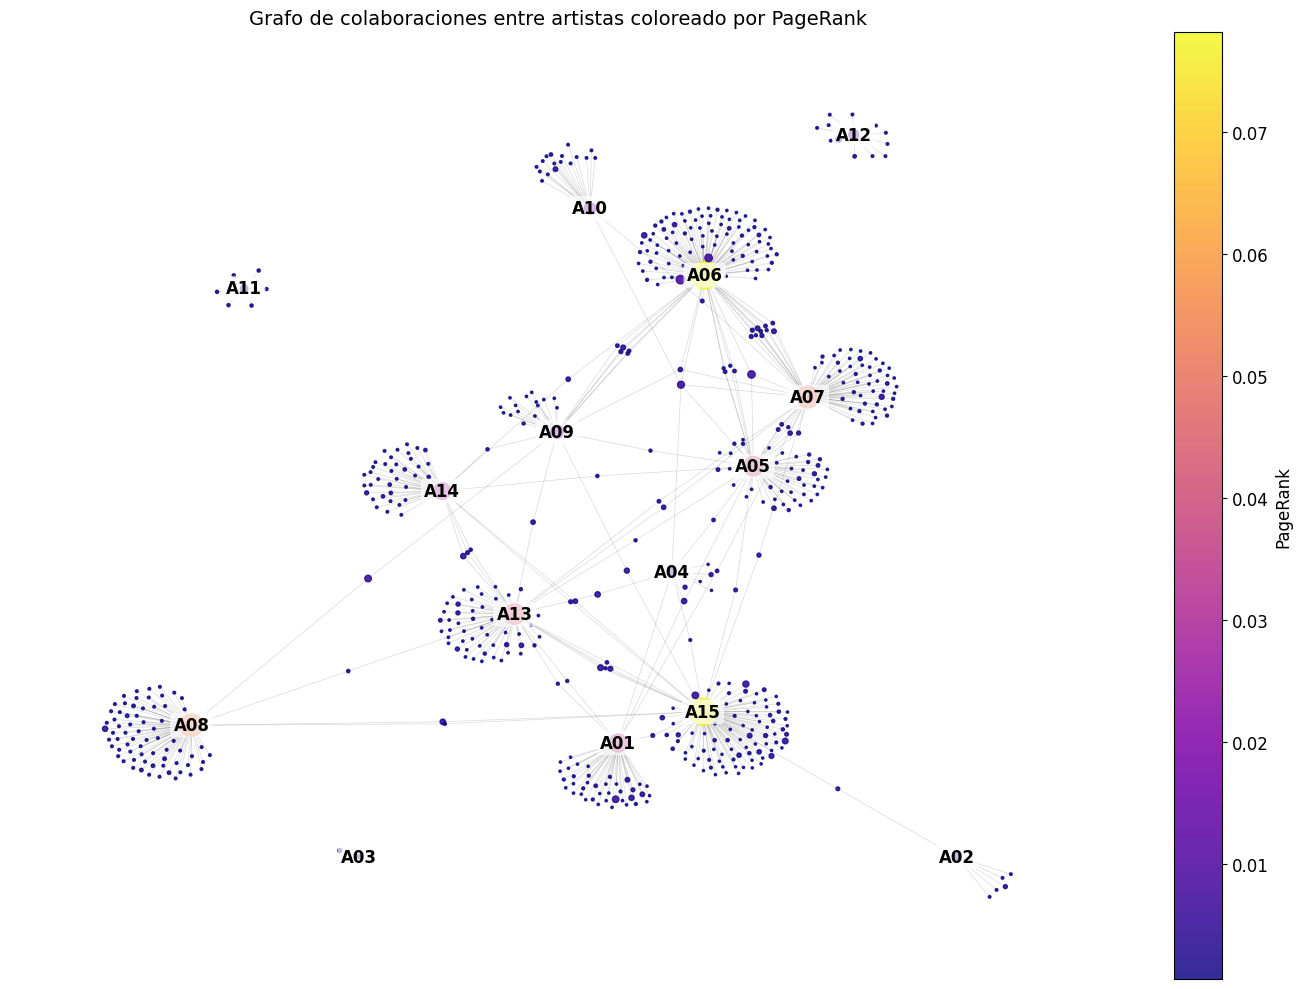

In [23]:
import matplotlib.pyplot as plt

# Calcular PageRank
pagerank = nx.pagerank(G, weight="cantidad")
sizes = [v * 5000 for v in pagerank.values()]

# Layout más disperso
pos = nx.spring_layout(G, seed=42, k=0.5, iterations=100)

plt.figure(figsize=(14, 10))

# Dibujar nodos
nodes = nx.draw_networkx_nodes(
    G, pos,
    node_size=sizes,
    node_color=list(pagerank.values()),
    cmap=plt.cm.plasma,
    alpha=0.85
)

# Dibujar aristas más finas y transparentes
nx.draw_networkx_edges(G, pos, alpha=0.15, width=0.5)

# Etiquetas solo para tus artistas (mapping definido antes)
labels = {name: artist_id for name, artist_id in mapping.items() if name in G.nodes}
nx.draw_networkx_labels(
    G, pos, labels=labels,
    font_size=12,  # 👈 aquí el cambio
    font_color="black", font_weight="bold",
    bbox=dict(facecolor="white", alpha=0.7, edgecolor="none", boxstyle="round,pad=0.2")
)

# Barra de colores con fuente tamaño 12
cbar = plt.colorbar(nodes)
cbar.set_label("PageRank", fontsize=12)
cbar.ax.tick_params(labelsize=12)


plt.title("Grafo de colaboraciones entre artistas coloreado por PageRank", fontsize=14)
plt.axis("off")
plt.tight_layout()
plt.show()
